In [1]:
#Import dependencies
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, desc

In [12]:
#create engine
engine = create_engine("sqlite:///hawaii.sqlite")

In [13]:
#prepare and reflect the database
Base = automap_base()
Base.prepare(engine, reflect=True)

In [14]:
conn = engine.connect()
inspector = inspect(engine)

In [15]:
#reference for table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [16]:
session = Session(engine)

In [17]:
##Prescription Analysis

In [18]:
#query the database for a years worth of precipitation data./
previousYearData = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2017-08-05").\
    filter(Measurement.date <= "2018-08-05").all()

In [21]:
prevYear = pd.DataFrame(previousYearData)
prevYear['date'] = pd.to_datetime(prevYear['date'])
prevYear = prevYear.set_index('date')
prevYear.head()

,prcp
date,
2017-08-05,0.0
2017-08-06,0.0
2017-08-07,0.0
2017-08-08,0.0
2017-08-09,0.0


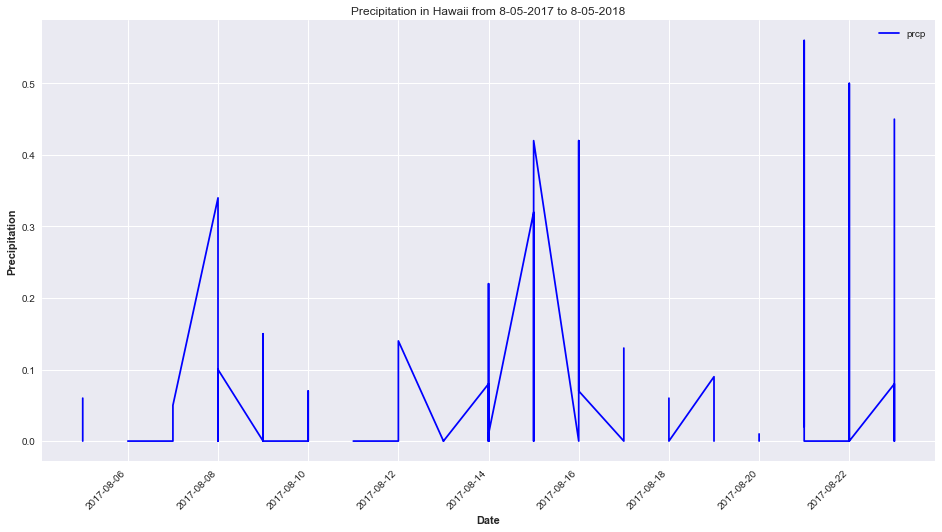

In [25]:
#Prescription Analysis Plot
prec_plot = prevYear.plot(figsize = (16, 9), sort_columns=True, rot=45, use_index=True, legend=True, grid=True, color='b')
plt.ylabel('Precipitation', weight='bold')
plt.xlabel('Date', weight='bold')
plt.title("Precipitation in Hawaii from 8-05-2017 to 8-05-2018")
plt.show()

In [27]:
#Stat Table
prevYear.describe()

,prcp
count,66.000000
mean,0.069848
std,0.135550
min,0.000000
25%,0.000000
50%,0.000000
75%,0.070000
max,0.560000


In [29]:
#Total number of station
totalStation = session.query(Station.id).count()
print(f"Total Station: {totalStation}")

Total Station: 9


In [33]:
#Most active stations in descending order
actionStation = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
actionStation

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
print(f"Station {actionStation[0]} is the most active")

Station ('USC00519281', 2772) is the most active


In [35]:
waihee_tobs = session.query(Measurement.tobs).\
filter(Measurement.station == "USC00519281", Measurement.station == Station.station, Measurement.date >="2016-08-23", Measurement.date <="2017-08-23").\
all()

In [36]:
temperatures = [temp[0] for temp in waihee_tobs]

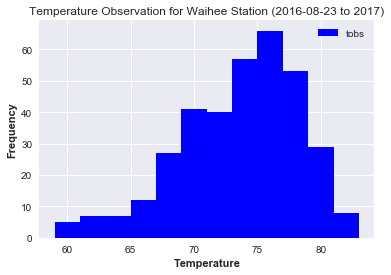

In [37]:
plt.hist(temperatures, bins=12, color='b')
plt.title("Temperature Observation for Waihee Station (2016-08-23 to 2017)")
plt.ylabel('Frequency', weight='bold')
plt.xlabel('Temperature', weight='bold')
labels = ['tobs']
plt.legend(labels)

In [45]:
#Calculate minimum, average, and maximum temperatures from 2017-08-05 to 2018-08-05
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2017-08-05', '2018-08-05'))

[(70, 78.97333333333333, 85)]


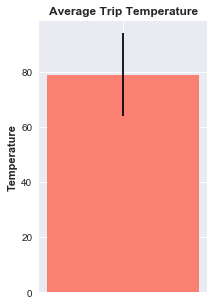

In [53]:
#Plot min, avg, and max temperature in bar chart
def plot_temps(start, end):
    query = session.query(Measurement.tobs).filter(Measurement.date>=start, Measurement.date<=end).all()
    temperatures = [temp[0] for temp in query]
    avg_temp = np.mean(temperatures)
    lowest_temp = min(temperatures)
    highest_temp = max(temperatures)
    

    plt.figure(figsize=(3,5))
    plt.bar(1, avg_temp, yerr=(highest_temp - lowest_temp), tick_label='', color='salmon')
    plt.ylabel("Temperature", weight="bold")
    plt.title("Average Trip Temperature", weight="bold")
    plt.show()
plot_temps(start="2017-08-05", end="2018-08-05")